In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from scipy.optimize import curve_fit
from pylab import *
import os

In [2]:
path ="/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting"
# Change the directory
os.chdir(path)

def read_files(file_path):
   with open(file_path, 'r') as file:
      print(file.read())
data=[]

# Iterate over all the files in the directory
for file in os.listdir():
   if file.endswith('.txt'):
      # Create the filepath of particular file
      #file_path=file  
        file_path=os.path.join(path,file)
      #file_path =f"{pathfile}"
        data.append(file_path)
        print(file_path)

/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_128_intt_1024_4588_baryc_30oct.txt
/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4494_baryc_2nov.txt
/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4526_baryc_2nov.txt
/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4552_baryc_30oct.txt
/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4622_baryc.txt
/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4680_baryc_30oct.txt
/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_

In [3]:
def sort_by_indexes(lst, indexes, reverse=False):
    return [val for (_, val) in sorted(zip(indexes, lst), key=lambda x: \
          x[0], reverse=reverse)]
#l2=[]
sort= [4,1,2,3,5,6,7]  #Setting index number according to band numbers
data_1=sort_by_indexes(data, sort)   
data_1   #Updated list of band path

['/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4494_baryc_2nov.txt',
 '/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4526_baryc_2nov.txt',
 '/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4552_baryc_30oct.txt',
 '/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_128_intt_1024_4588_baryc_30oct.txt',
 '/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4622_baryc.txt',
 '/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/evn/new_evn/fitting/ps_fny_512_intt_1024_4680_baryc_30oct.txt',
 '/media/biki/Elements/laptop_recovery/phd/research_work/Project1/4u154347/laxpc2/output/e

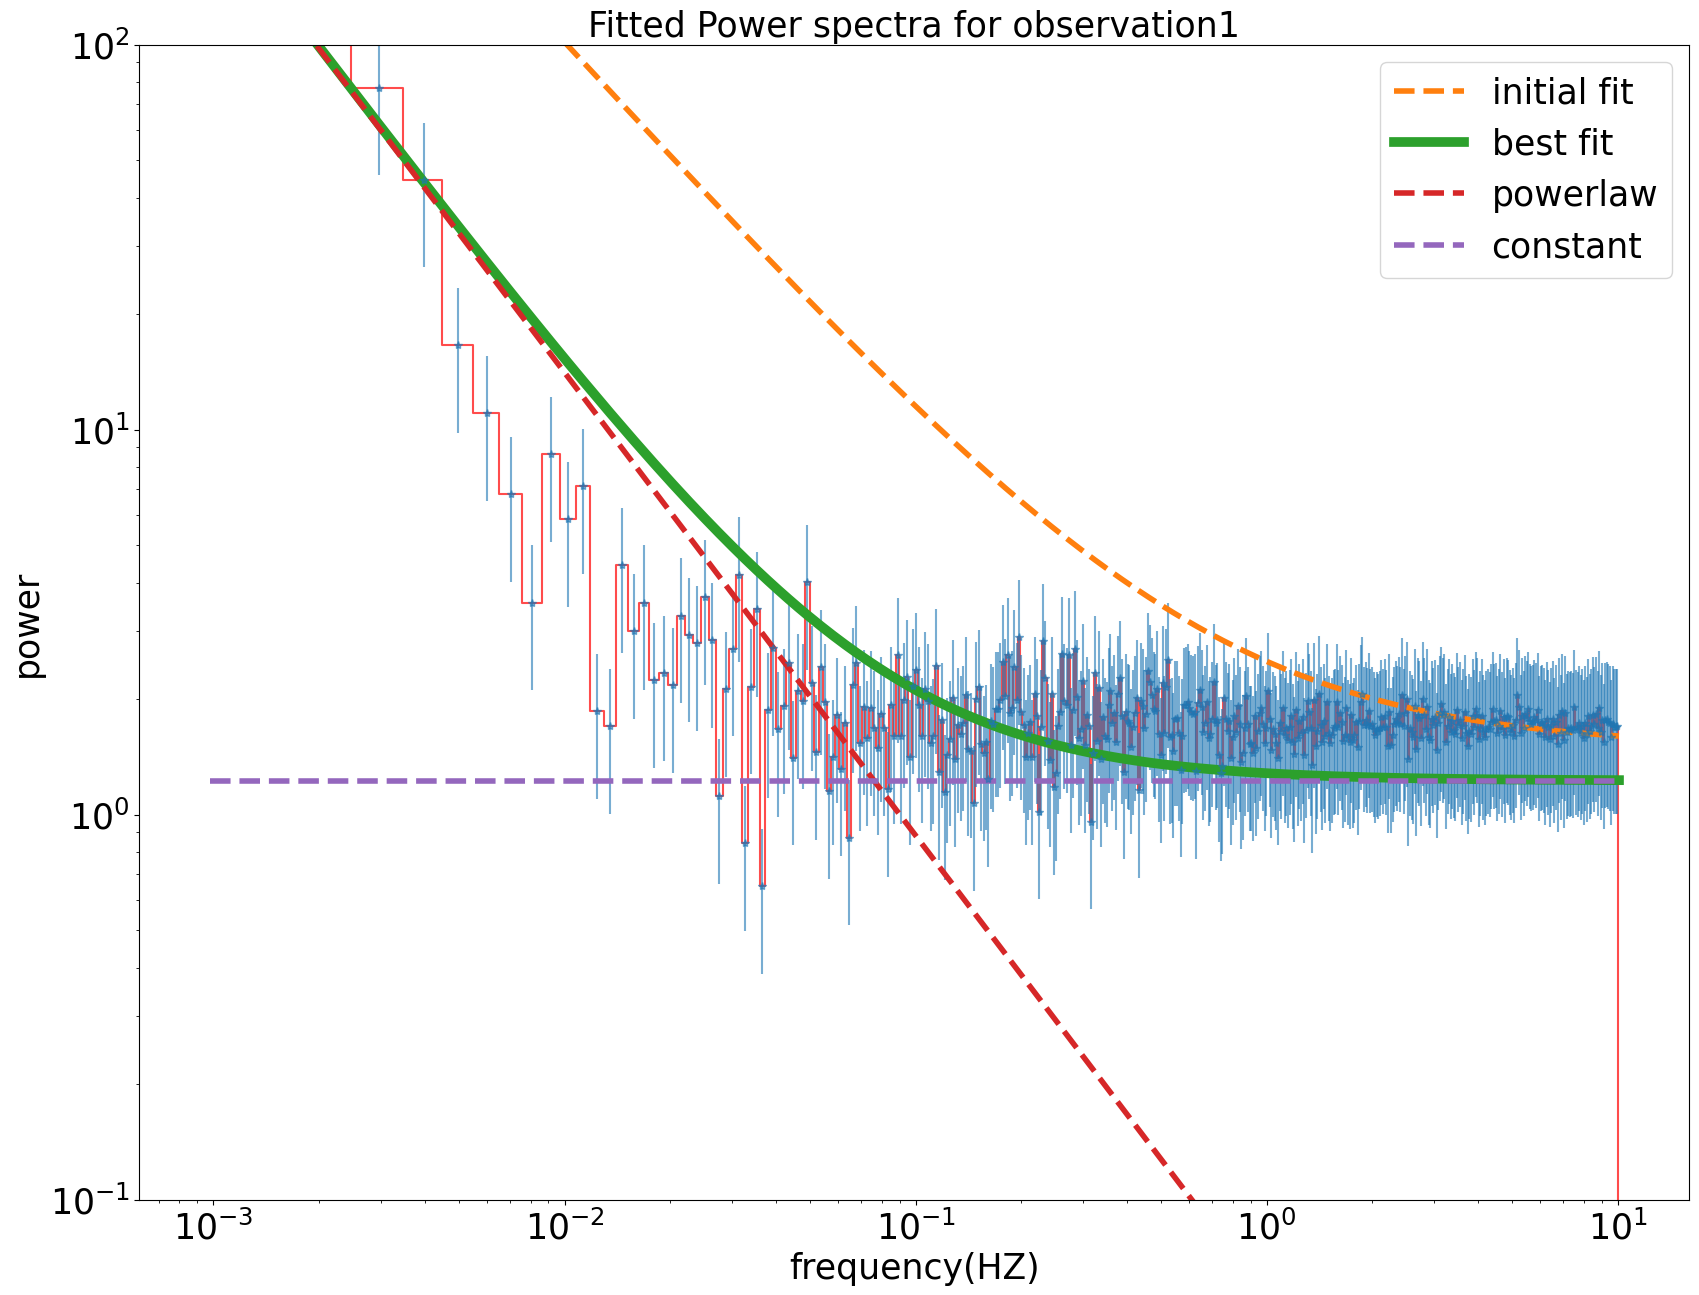

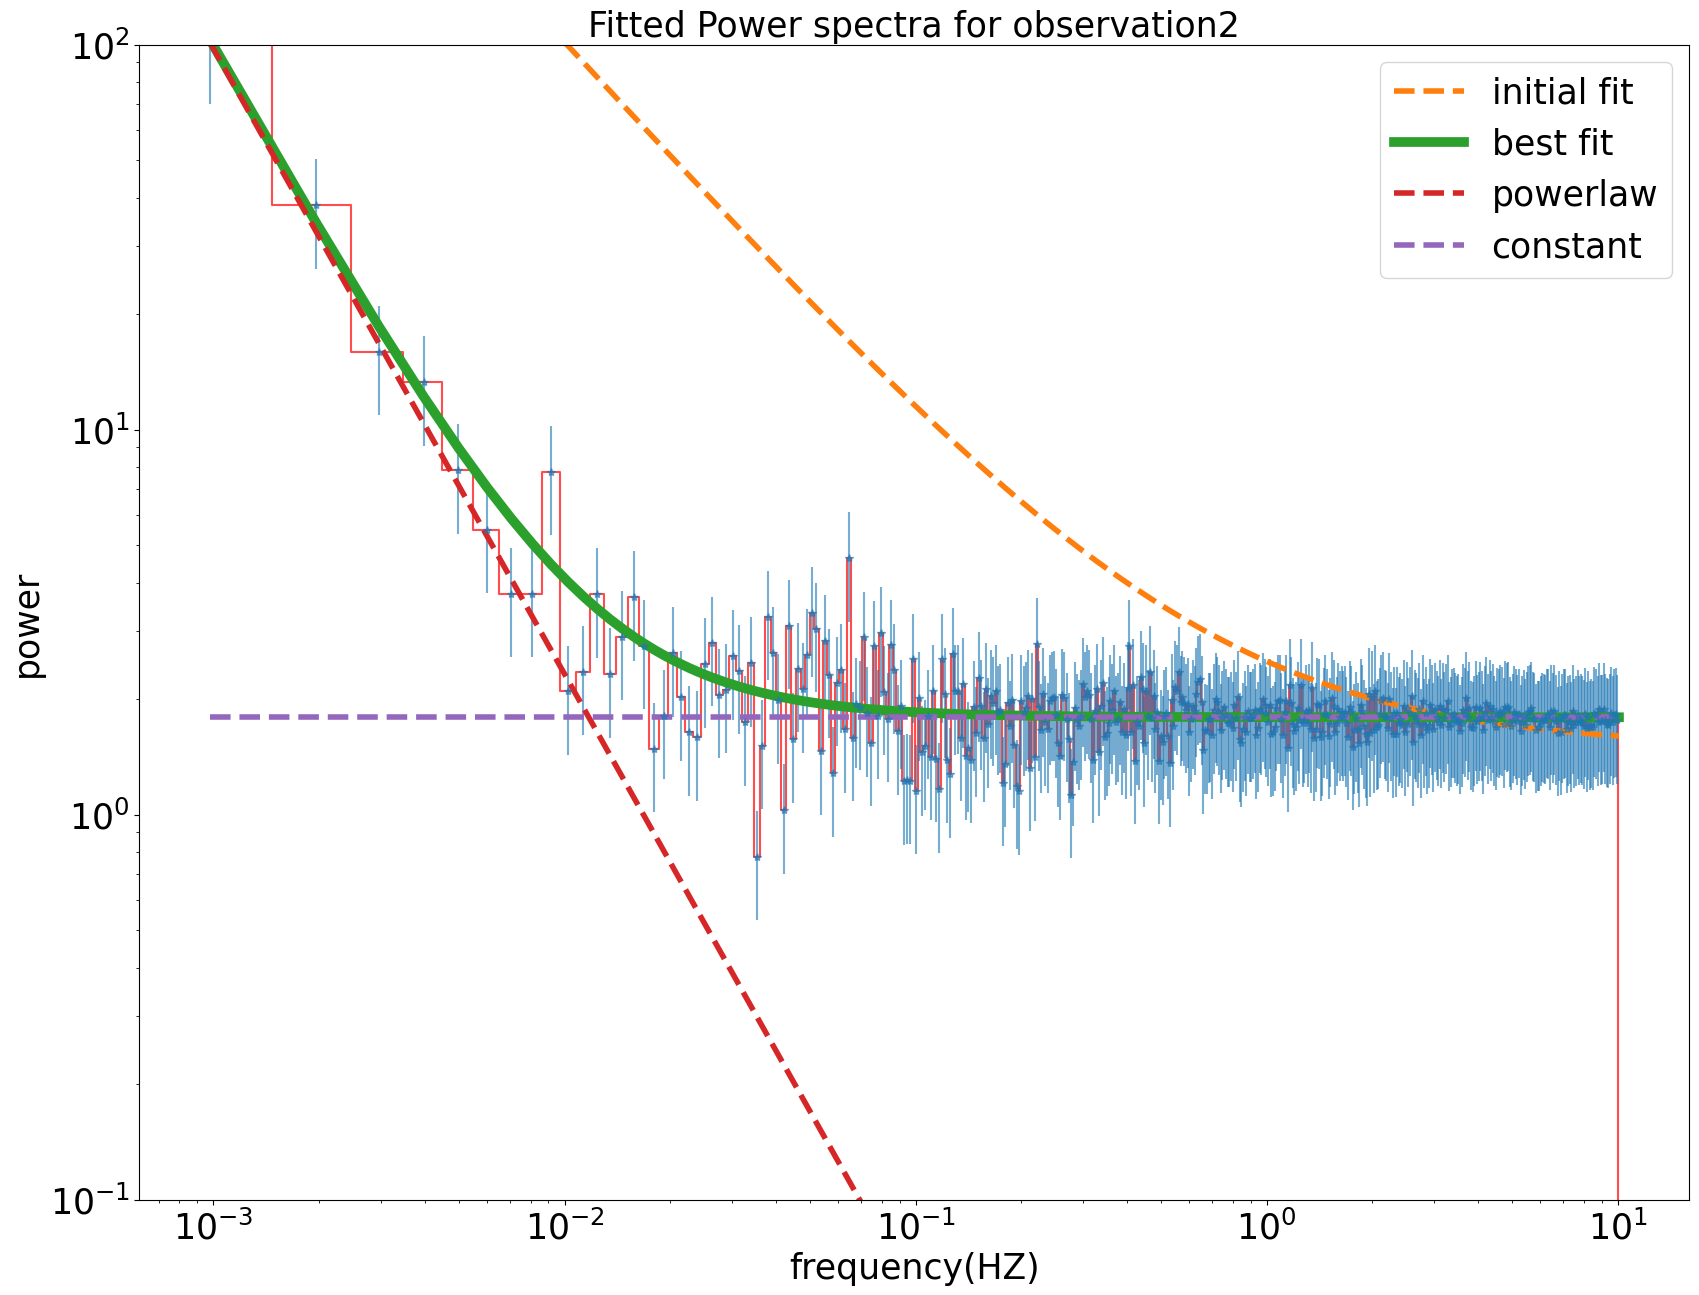

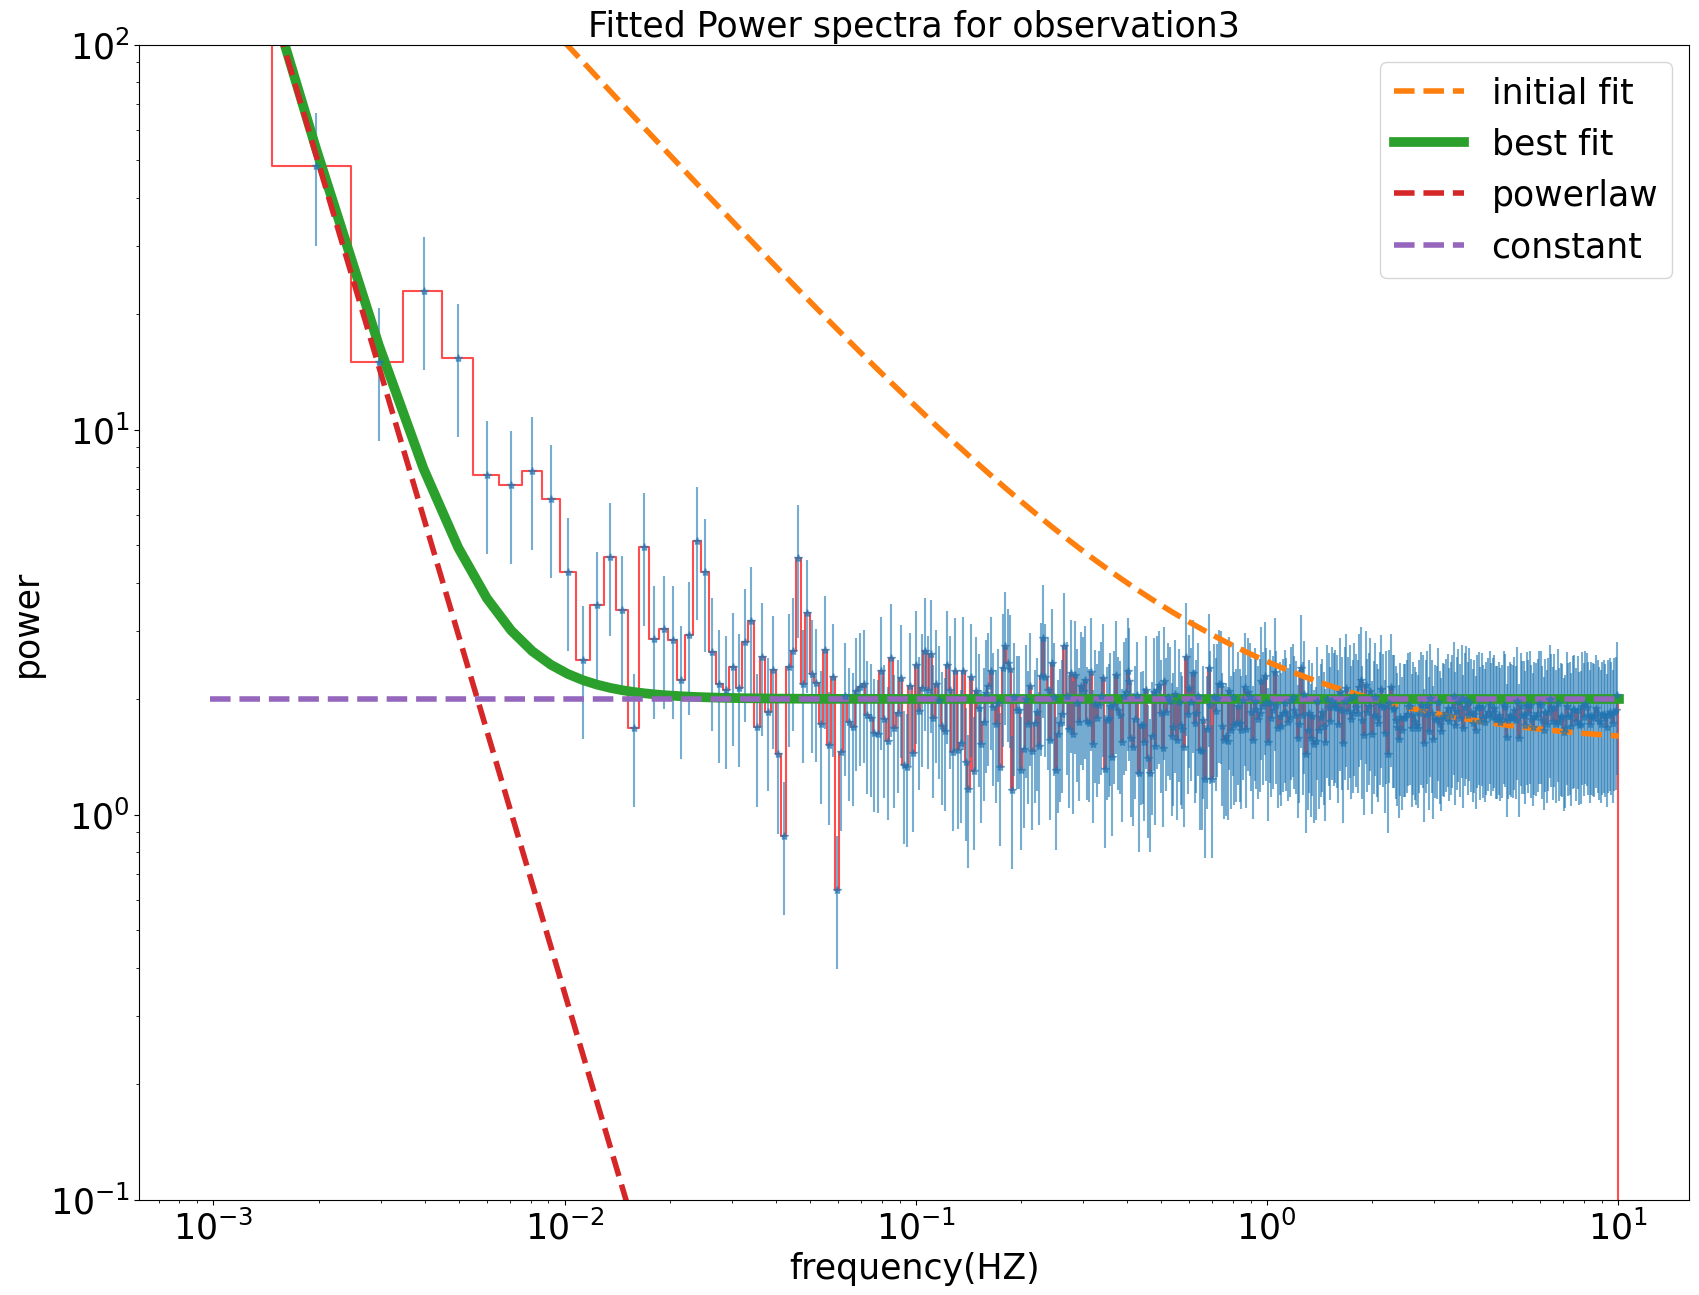

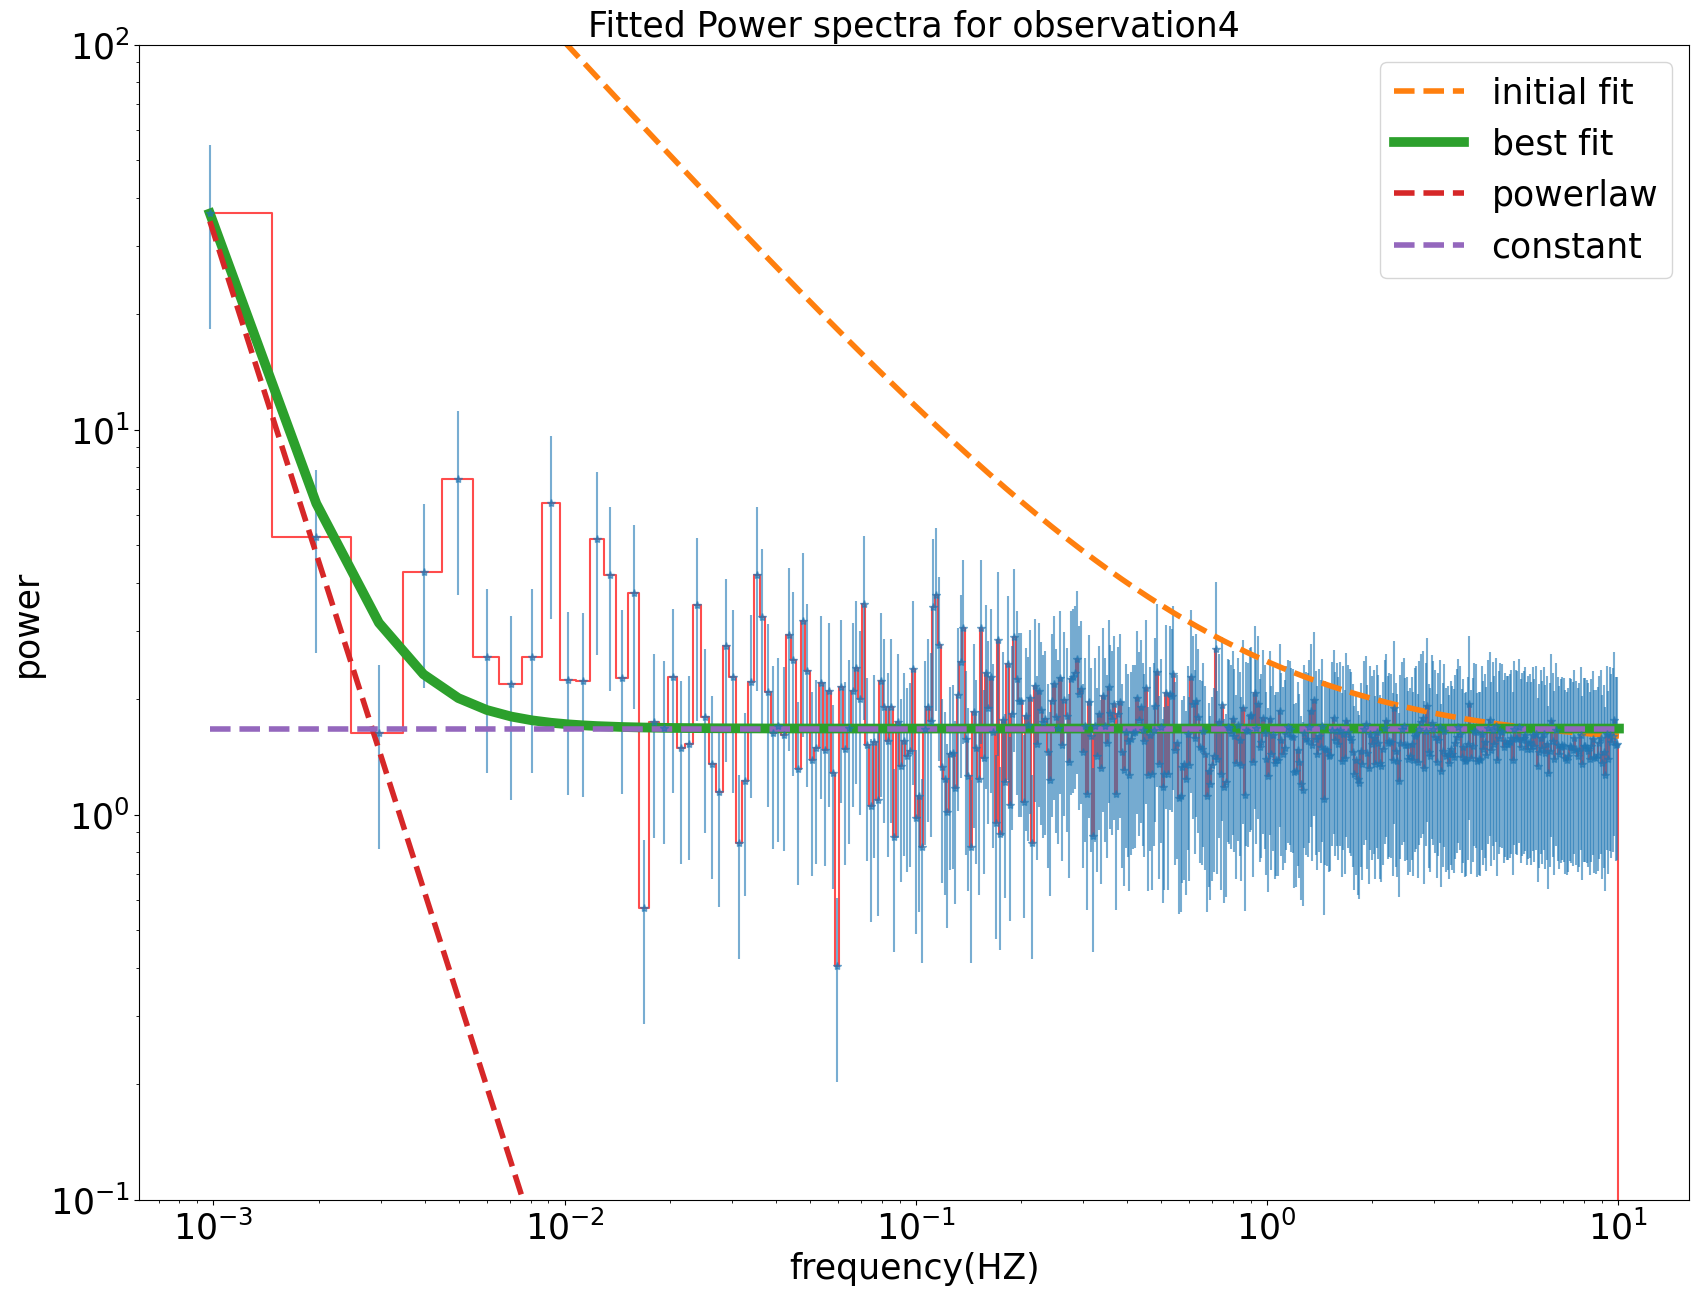

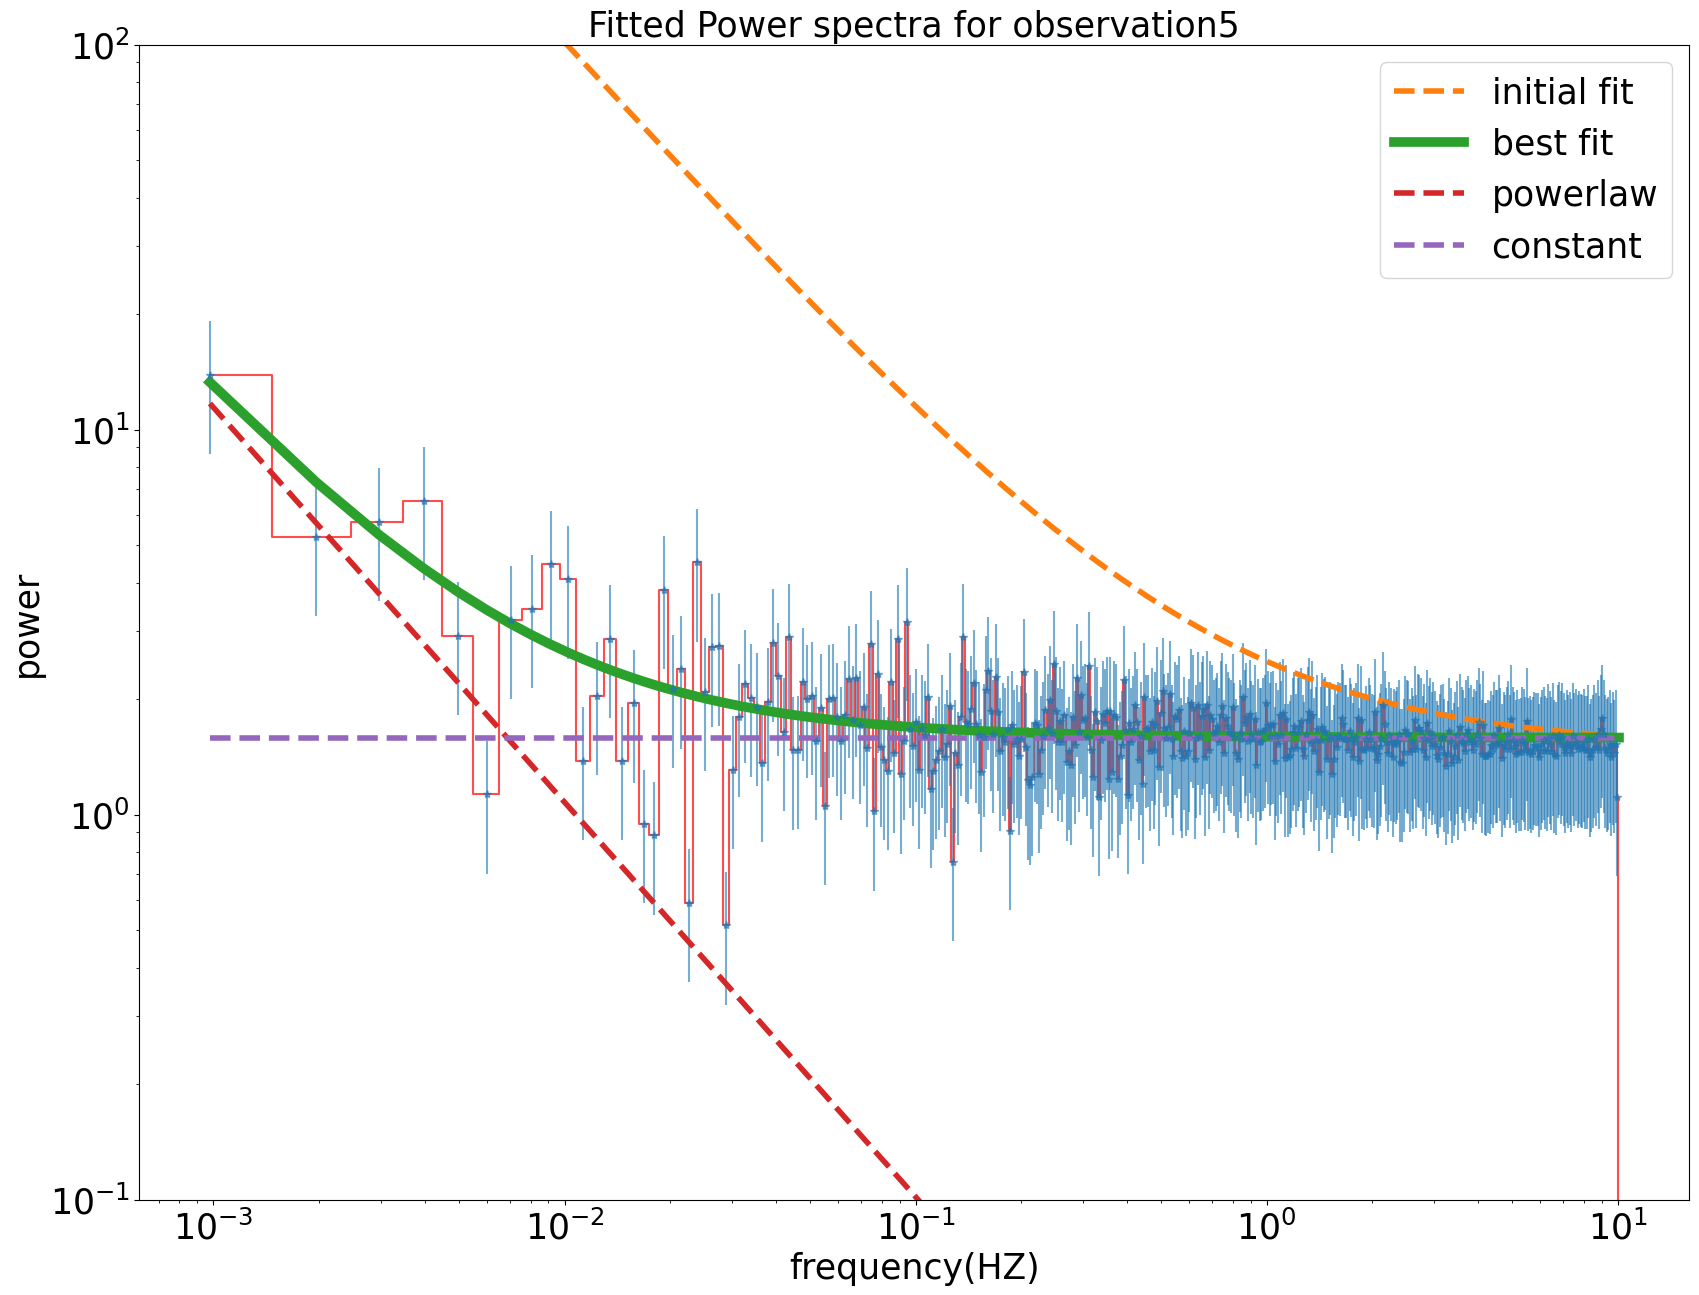

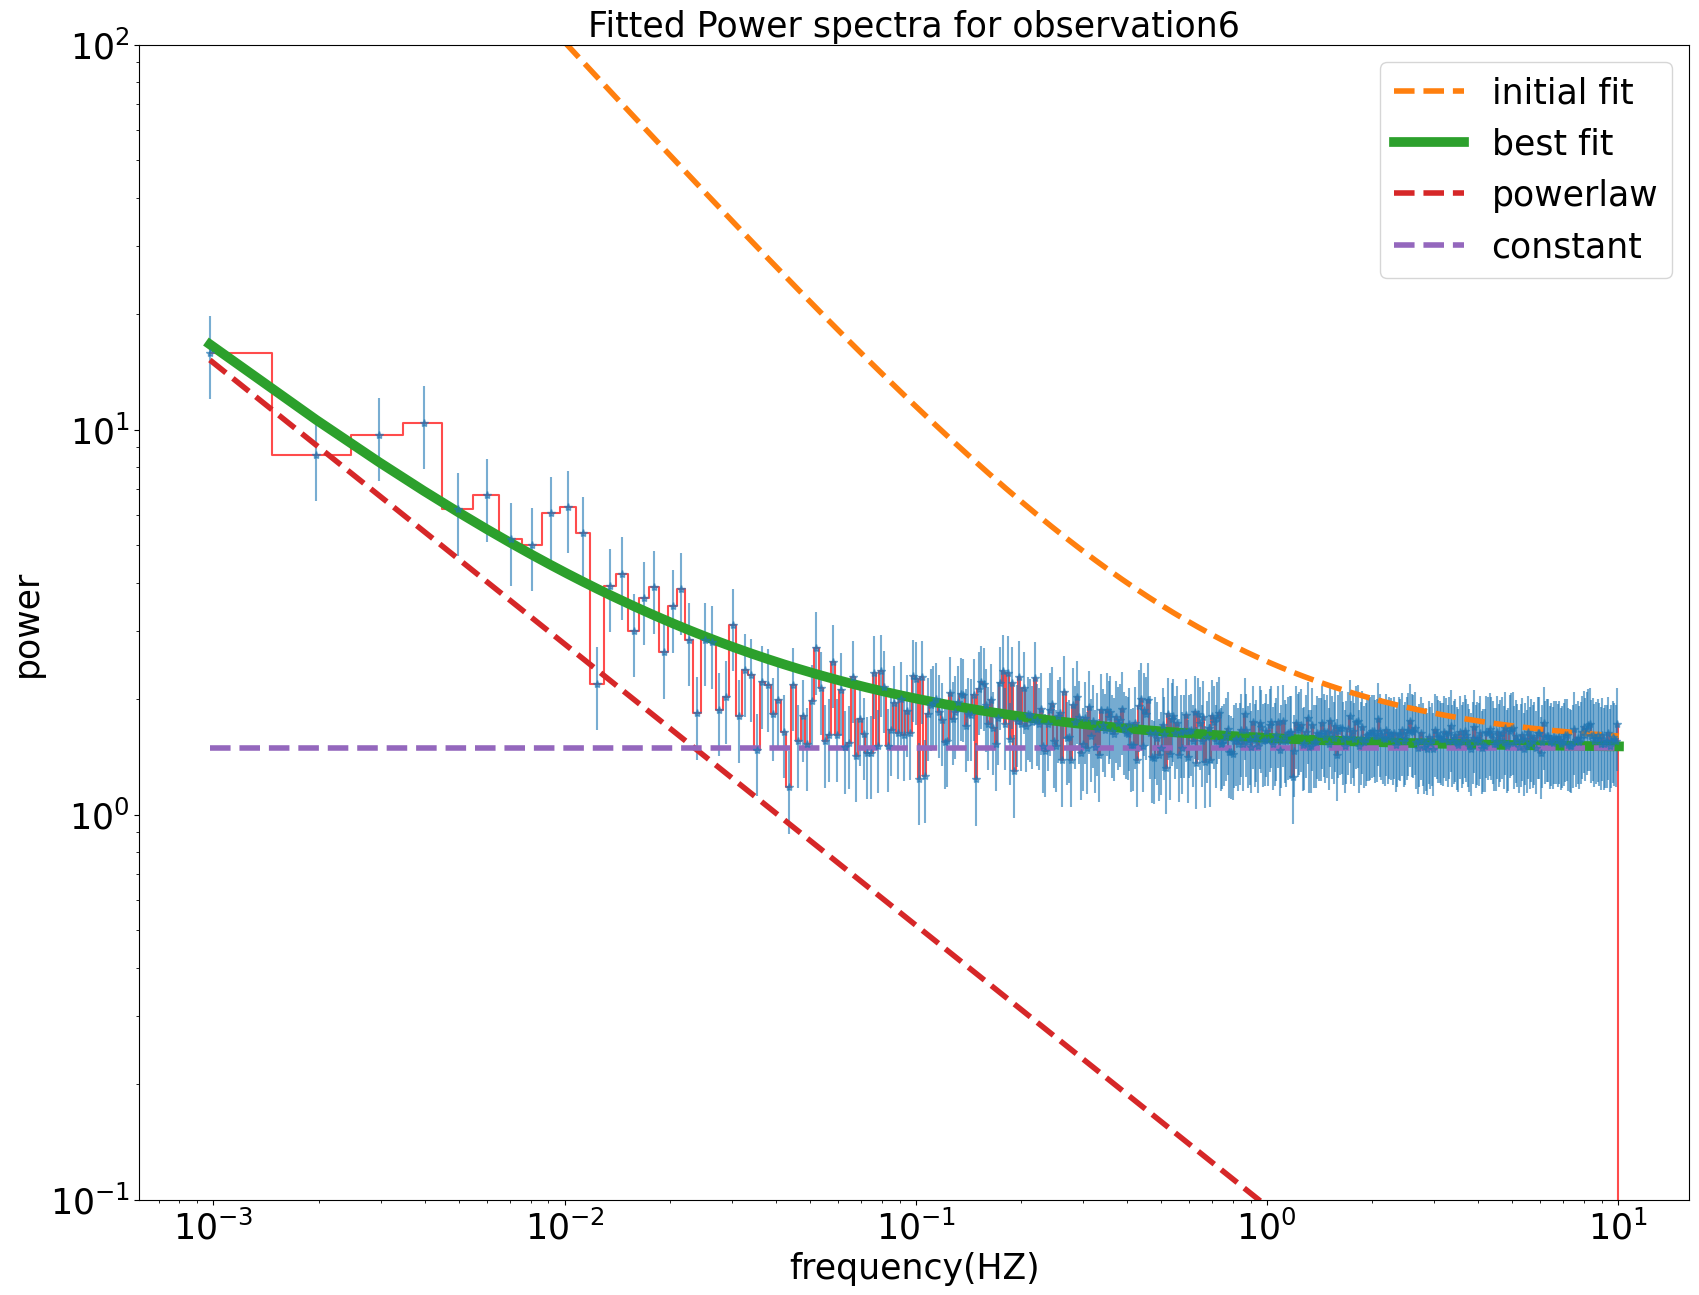

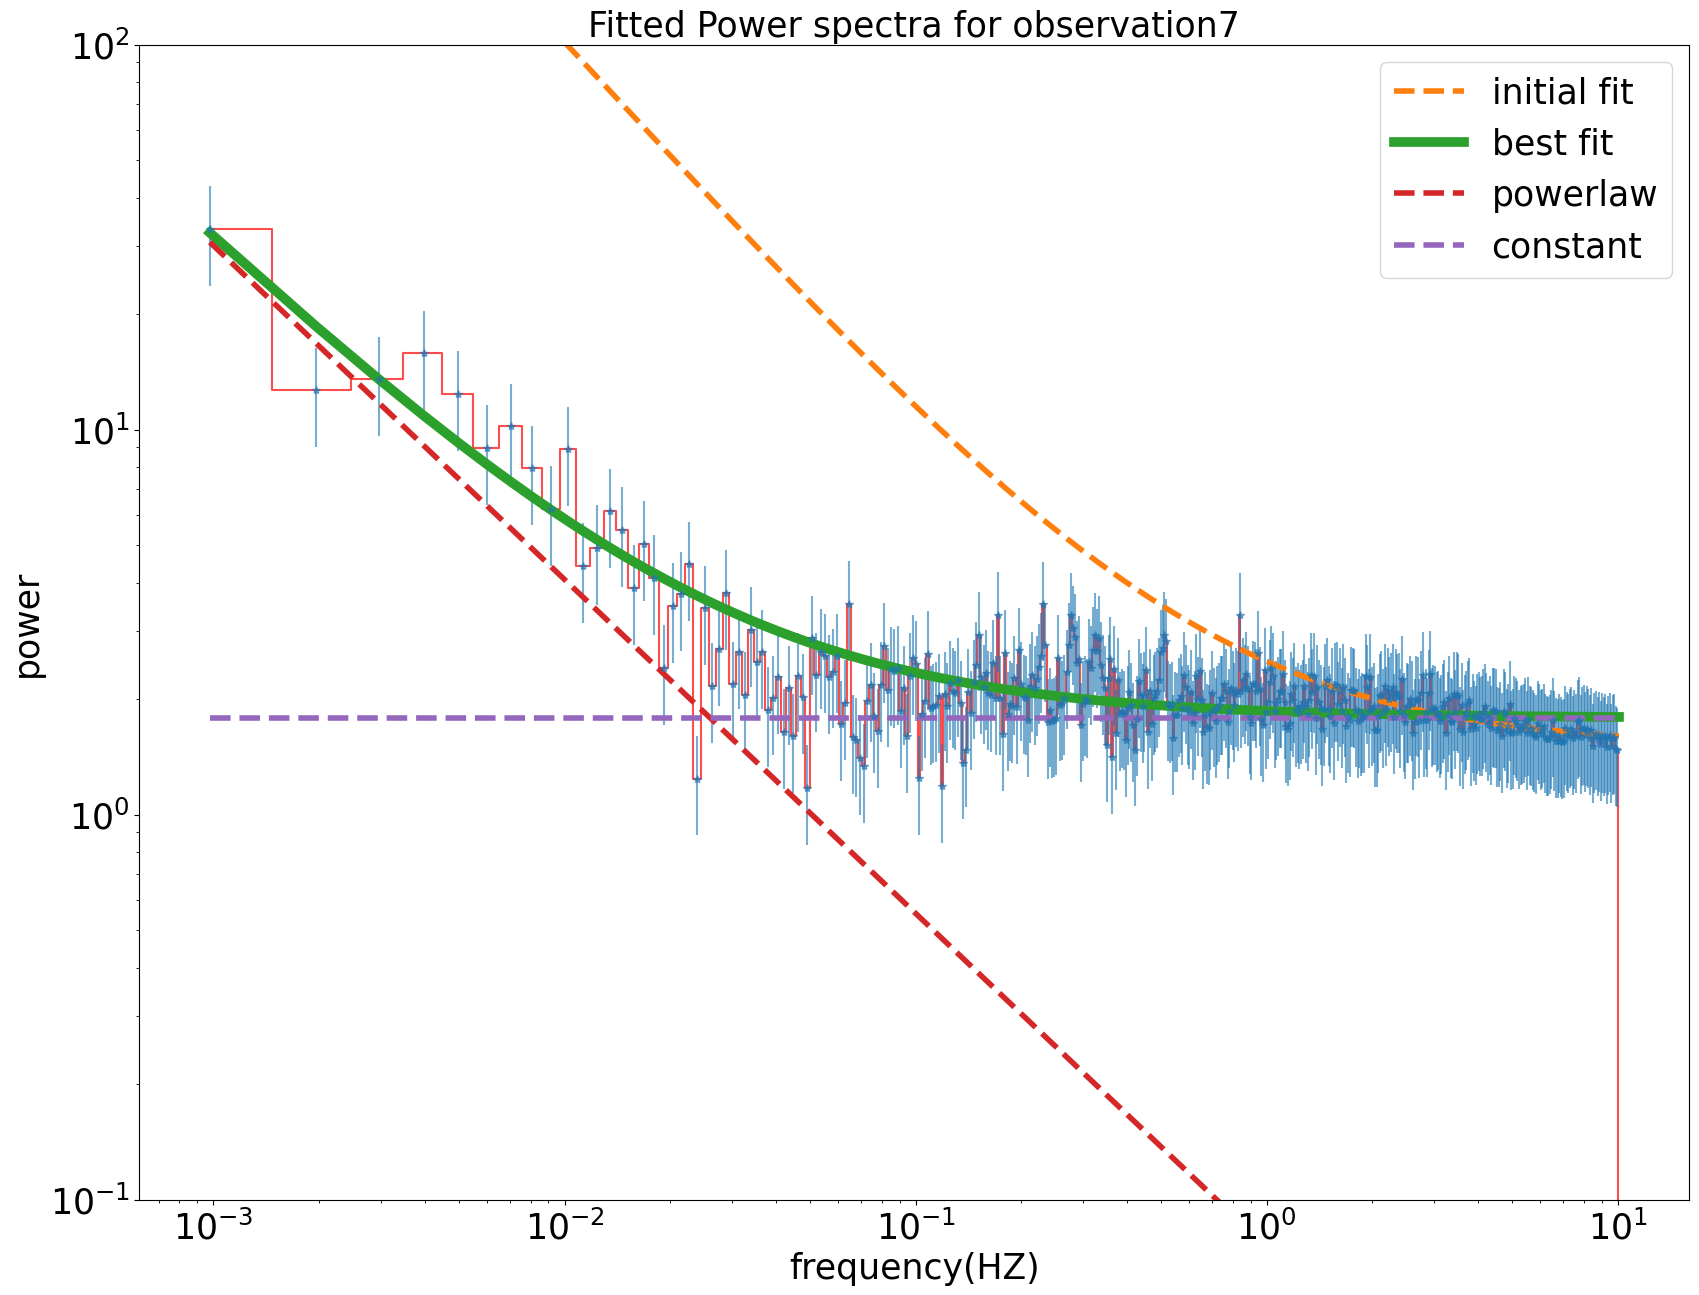

In [12]:
rmss=[]
for i in range(1,len(data_1)+1,1):
#for i in range(1,2,1):
    f = np.genfromtxt(data_1[i-1])
    freq=f[:,0]
    power=f[:,1]
    err= f[:,2]
    power=power[freq<10] 
    err=err[freq<10]
    freq=freq[freq<10]
    
    
    

    pw=power
    fr=freq
    df = fr[0]
    fac=0.01
    j=1
    frnext = fr[0]
    rfr = [fr[0]]       #Rebinned frequency array initalization
    #print(min(fr), max(fr))
    while (frnext < max(fr)):   #Loop to rebin frequency logarithmically
        ndf = df*(1+fac)
        frnext = frnext + ndf
        rfr.append(frnext)
        df = ndf
        j = j + 1

    #print(len(fr), 'modified to ' ,len(rfr))

    rpw =[0]*len(rfr)   #Rebinned power array initalization
    for j in range(0, len(rfr)-1):  #Loop to rebin corresponding power logarithmically
        xx = np.nonzero((fr >= rfr[j]) & (fr < rfr[j+1]))
        pwi = pw[xx]
        rpw[j] = np.mean(pwi)
    rerr =[0]*len(rfr)   #Rebinned power array initalization
    for j in range(0, len(rfr)-1):  #Loop to rebin corresponding power logarithmically
        xx = np.nonzero((fr >= rfr[j]) & (fr < rfr[j+1]))
        pwi = err[xx]
        rerr[j] = np.mean(pwi)

    #print(len(rfr))
    #print(len(rpw))
    

    
    x=rfr
    y=rpw
    def powerlaw(x,a,alpha):
        return a*x**alpha
    #def lorentzian1(x,amp,wd,cent,cons):
        #return (((amp**2/3.14) * (wd/2)) / ( (wd/2)**2 + ( x - cent )**2) )+cons
    def constant(x,c):
        return 0*x+c
    mod =  Model(powerlaw) + Model(constant)
    pars=mod.make_params(cons=0,a=1,alpha=-1,c=1.5)
    result = mod.fit(y, pars, x=x)
    #pars=mod.make_params(amp=1,wd=1,cent=0,cons=0,amp2=1,wd2=1,cent2=1,cons2=1)#a=1,alpha=-1,
    pars.add('wd',value=0,min=0,max=1000)
    pars.add('wd2',value=0,min=0,max=1000)
    pars.add('c',value=0,min=0,max=1000)
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(15)
    comps = result.eval_components()
    #rc('axes', linewidth=4)

    plt.step(x, y,'r',where='mid',alpha=0.7)
    plt.errorbar(x, y,yerr=rerr,fmt= '*',alpha=0.6)
 

    plt.plot(x, result.init_fit, '--',linewidth=4, label='initial fit')
    plt.plot(x, result.best_fit, '-',linewidth=7, label='best fit',alpha=1.0)
    plt.ylim(0.1,100)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.plot(x, comps['powerlaw'], '--', linewidth=4,label='powerlaw')
    #plt.plot(x, comps['lorentzian1'], '--', label='lorentzian 1')
    #plt.plot(x, comps['lorentzian1'], '--',label='lorentzian 1')
    plt.plot(x, comps['constant'], '--',linewidth=4, label='constant')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('frequency(HZ)',fontsize=25)
    plt.ylabel('power',fontsize=25)
    plt.title('Fitted Power spectra for observation' +str(i),fontsize=25)
    plt.legend(fontsize=25)
   # plt.savefig('4680_fitting.jpg',dpi=300)
    plt.show()
    
    


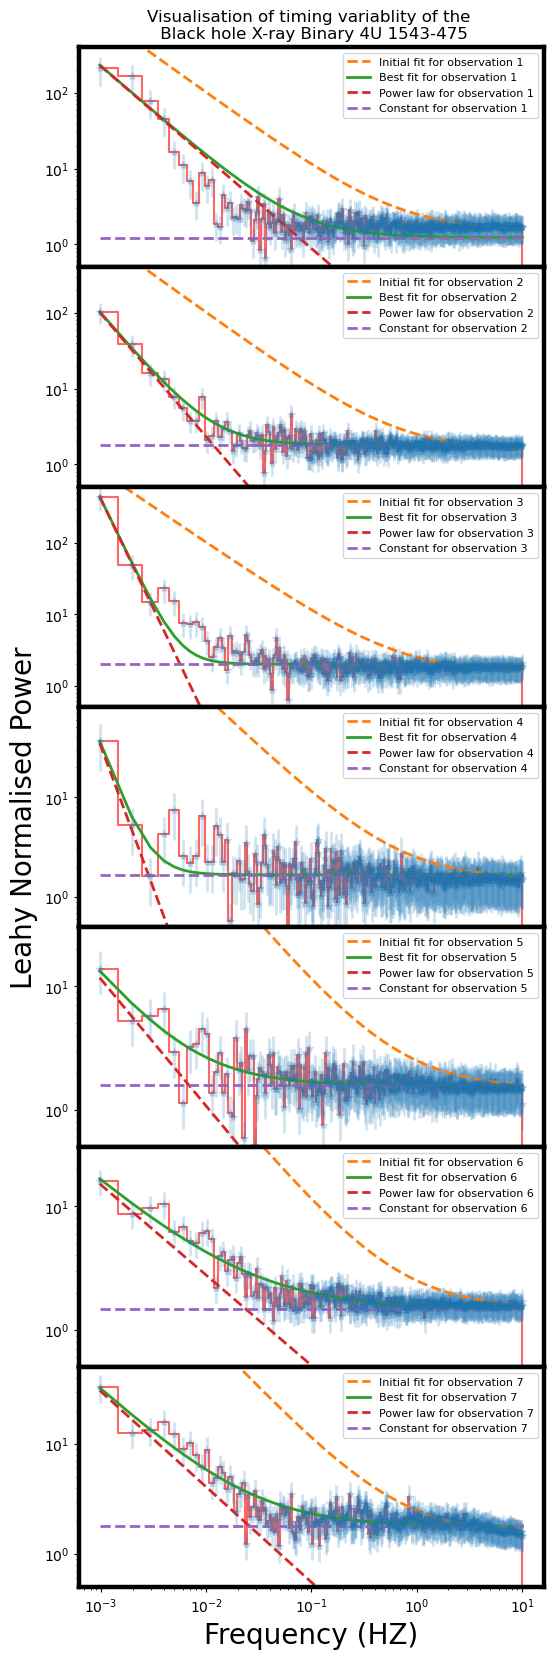

In [86]:
fig, ax = plt.subplots(nrows=len(data_1), ncols=1,figsize=(6,20),gridspec_kw={'hspace': 0.0, 'wspace': 0.1})  # Create a figure and axes object for plotting

for i, data_file in enumerate(data_1, start=1):
    f = np.genfromtxt(data_file)
    #fig, ax = plt.subplots(nrows=len(data_1), ncols=1,figsize=(6,20),gridspec_kw={'hspace': 0.0, 'wspace': 0.1})  # Create a figure and axes object for plotting

    freq = f[:, 0]
    power = f[:, 1]
    err = f[:, 2]
    power = power[freq < 10] 
    err = err[freq < 10]
    freq = freq[freq < 10]

    pw = power
    fr = freq
    df = fr[0]
    fac = 0.01
    j = 1
    frnext = fr[0]
    rfr = [fr[0]]
    while (frnext < max(fr)):
        ndf = df * (1 + fac)
        frnext = frnext + ndf
        rfr.append(frnext)
        df = ndf
        j = j + 1

    rpw = [0] * len(rfr)
    for j in range(0, len(rfr) - 1):
        xx = np.nonzero((fr >= rfr[j]) & (fr < rfr[j + 1]))
        pwi = pw[xx]
        rpw[j] = np.mean(pwi)
    rerr = [0] * len(rfr)
    for j in range(0, len(rfr) - 1):
        xx = np.nonzero((fr >= rfr[j]) & (fr < rfr[j + 1]))
        pwi = err[xx]
        rerr[j] = np.mean(pwi)

    x = rfr
    y = rpw

    def powerlaw(x, a, alpha):
        return a * x ** alpha

    def constant(x, c):
        return 0 * x + c

    mod = Model(powerlaw) + Model(constant)
    pars = mod.make_params(cons=0, a=1, alpha=-1, c=1.5)
    result = mod.fit(y, pars, x=x)
    pars.add('wd', value=0, min=0, max=1000)
    pars.add('wd2', value=0, min=0, max=1000)
    pars.add('c', value=0, min=0, max=1000)
    comps = result.eval_components()
    rc('axes', linewidth=3.2)
    ax[0].set_title('Visualisation of timing variablity of the \n Black hole X-ray Binary 4U 1543-475')
    
    ax[3].set_ylabel('Leahy Normalised Power',fontsize=20)
    ax[i-1].step(x, y, 'r', where='mid', alpha=0.6,linewidth=1.5)
    ax[i-1].errorbar(x, y, yerr=rerr, fmt='*', alpha=0.2,linewidth=2)
    ax[i-1].plot(x, result.init_fit, '--', linewidth=2, label=f'Initial fit for observation {i}')
    ax[i-1].plot(x, result.best_fit, '-', linewidth=2, label=f'Best fit for observation {i}', alpha=1.0)
    ax[i-1].plot(x, comps['powerlaw'], '--', linewidth=2, label=f'Power law for observation {i}')
    ax[i-1].plot(x, comps['constant'], '--', linewidth=2, label=f'Constant for observation {i}')
    #ax.title('Fitted Power spectra for observation',fontsize=25)
    #ax[i].set_xlim(0.005, 9.8)
    ax[0].set_ylim(0.5, 400)
    ax[1].set_ylim(0.5, 400)
    ax[2].set_ylim(0.5, 600)
    ax[3].set_ylim(0.5, 80)
    ax[4].set_ylim(0.5, 30)
    ax[5].set_ylim(0.5, 30)
    ax[6].set_ylim(0.5, 50)

    ax[i-1].set_xscale('log')
    ax[i-1].set_yscale('log')
    #ax[i-1].set_xticklabels([])
    ax[i-1].legend(fontsize=8)
    #ax[i-1].set_xlabel('Frequency (Hz)', fontsize=25)
    #ax[i-1].set_ylabel('Leahy Power', fontsize=12)
    ax[i-1].set_xlabel('Frequency (HZ)',fontsize=20)
#ax.set_xticklabels()
fig.savefig('Fitted_Leahy_Normalised_Power_spectra.png')